In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm

In [2]:
class histContainer:
    def __init__(self,path,noMeta=False,bkg=False):
        if noMeta:
            self.histos, self.metadata = util.load(path), None
        else:
            self.histos, self.metadata = util.load(path)
        self.hnames = list(self.histos.keys())
        if bkg:
            self.catSamps,self.catNames = utils.bkg_categories(self.histos['cutflow'])
            self.cats = list(self.catSamps.keys())
    def load(self,hname):
        return self.histos[hname]
    def load(self,hname):
        return self.histos[hname]
    def names(self,spec=None):
        if spec is not None:
            print("\n".join([h for h in self.hnames if spec in h]))
        else:
            print("\n".join(self.hnames))

In [3]:
hcb = histContainer("bkg_2018_triggerStudy.coffea")
hcs = histContainer("signal_2018_triggerStudy.coffea")
hcd = histContainer("data_2018_EGamma_v1_triggerStudy.coffea")

def get_eff(h):
    num = h[{'passTrig':1}]
    bins = num.axes[0].edges
    num = num.values()
    den = h[{'passTrig':sum}].values()
    eff = np.divide(num,den,where=den!=0,out=np.zeros_like(num))
    eff_uncert = eff * (np.divide(1,num,where=num!=0,out=np.zeros_like(num)) +\
                                np.divide(1,den,where=den!=0,out=np.zeros_like(den)))
    return eff, eff_uncert, bins

In [10]:
rebin = 20j
hs = hcs.load("MET_passTrig_all")[{"samp":sum}][::rebin,:]
hb = hcb.load("MET_passTrig")[{"samp":sum}][::rebin,:]
hd = hcd.load("MET_passTrig")[{"samp":sum}][::rebin,:]

sig_eff,sig_eff_uncert,bins = get_eff(hs)
bkg_eff,bkg_eff_uncert,bins = get_eff(hb)
data_eff,data_eff_uncert,bins = get_eff(hd)

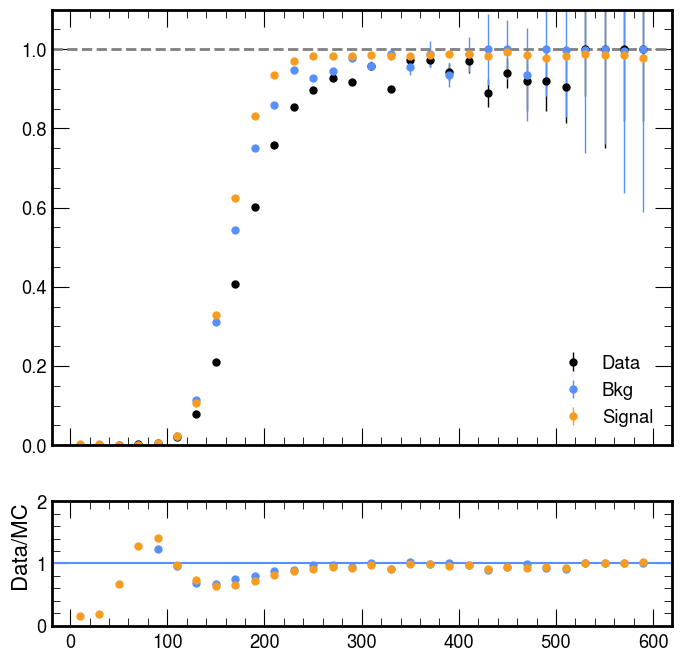

In [11]:
fig,axes = plt.subplots(2,1,height_ratios=[3.5,1],sharex=True,figsize=(8,8))
plt.sca(axes[0])
hep.histplot([data_eff,bkg_eff,sig_eff],color=['k','C0','C1'],bins=bins,
             yerr=[data_eff_uncert,bkg_eff_uncert,sig_eff_uncert],label=['Data','Bkg','Signal'],histtype='errorbar')
plt.ylim([0,1.1])
plt.axhline(1,linestyle='--',color='gray',lw=2)
plt.legend(loc='lower right')
plt.sca(axes[1])
hep.histplot(data_eff/bkg_eff,bins=bins,histtype='errorbar',yerr=False,color='C0')
hep.histplot(data_eff/sig_eff,bins=bins,histtype='errorbar',yerr=False,color='C1')
plt.ylabel("Data/MC")
plt.ylim([0,2])
plt.axhline(1)